#💡**Analisis Pola Kekuatan Password: Studi Karakteristik dan Distribusi Menggunakan Dataset Password Strength Classifier**

**DATASET PASSWORD STRENGTH CLASSIFIER**

Link Dataset: https://www.kaggle.com/datasets/bhavikbb/password-strength-classifier-dataset

## **Tujuan Analisis:**
1. Menganalisis pola dan karakteristik pada tiap kategori kekuatan password (lemah, sedang, kuat).
2. Mengukur dan memvisualisasikan distribusi password pada tiap kategori dalam Password Strength Classifier Dataset
3. Mengidentifikasi faktor-faktor yang berpengaruh terhadap kekuatan password dan memberikan wawasan untuk peningkatan keamanan.


In [ ]:
import pandas as pd
import numpy as np
import string
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# Load dataset
df = pd.read_csv("/content/drive/MyDrive/StatProb/data.csv", on_bad_lines="skip")
print("Dataset size: ", df.shape)
df.head()

Mounted at /content/drive
Dataset size:  (669640, 2)


,password,strength
0,kzde5577,1
1,kino3434,1
2,visi7k1yr,1
3,megzy123,1
4,lamborghin1,1


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **1. Deskripsi Dataset**
- Jumlah observasi (baris) dan variabel (kolom)
- Tipe data setiap kolom (numerik, kategorikal, teks)
- Informasi missing values
- Duplicate records
- Ringkasan statistik deskriptif (mean, median, min, max, std, dll.)

In [ ]:
# get the shape of the dataset
baris, kolom = df.shape
print("baris:", baris)
print("kolom:", kolom)

# get info of the dataset
df.info()

# get statistical summary
df.describe()

baris: 669640
kolom: 2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 669640 entries, 0 to 669639
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   password  669639 non-null  object
 1   strength  669640 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 10.2+ MB


,strength
count,669640.000000
mean,0.990196
std,0.507948
min,0.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,2.000000


- Mengetahui ukuran dataset (berapa baris & kolom).
- Melihat informasi umum dataset (nama kolom, tipe data, jumlah nilai yang tidak kosong).
- Mendapatkan ringkasan statistik dasar (rata-rata, min, max, kuartil) untuk kolom numerik.



Dataset terdiri dari 669639 baris dan 2 kolom. Semua kolom password berisi kombinasi huruf dan angka yang dikategorikan berdasarkan kekuatan lemah, sedang, dan kuatnya password tersebut.
Dari hasil analisis berdasarkan data yang ditunjukkan, kekuatan password memiliki kecenderungan 1 (sedang).



In [ ]:
# Feature engineering
df["length"] = df["password"].str.len()
df["num_digits"] = df["password"].str.count(r"\d")
df["num_symbols"] = df["password"].str.count(rf"[{string.punctuation}]")
df["num_upper"] = df["password"].str.count(r"[A-Z]")
df["num_lower"] = df["password"].str.count(r"[a-z]")

print(df)

            password  strength  length  num_digits  num_symbols  num_upper  \
0           kzde5577         1       8           4            0          0   
1           kino3434         1       8           4            0          0   
2          visi7k1yr         1       9           2            0          0   
3           megzy123         1       8           3            0          0   
4        lamborghin1         1      11           1            0          0   
...              ...       ...     ...         ...          ...        ...   
669634    10redtux10         1      10           4            0          0   
669635     infrared1         1       9           1            0          0   
669636  184520socram         1      12           6            0          0   
669637     marken22a         1       9           2            0          0   
669638      fxx4pw4g         1       8           2            0          0   

        num_lower  
0               4  
1               4  
2  

1. Length (panjang password) menghitung jumlah karakter dalam setiap password.
2. Num_digits (jumlah angka) menghitung berapa banyak karakter numerik (0–9) dalam password.
3. Num_symbols (jumlah simbol) menghitung jumlah simbol berdasarkan string.punctuation (misalnya !@#$%^&*).
4. Num_upper (jumlah huruf kapital) menghitung jumlah huruf besar (A–Z) dalam password.
5. Num_lower (jumlah huruf kecil) menghitung jumlah huruf kecil (a–z) dalam password.



# 2. Analisis Missing Values & Outlier
- Persentase data yang hilang per kolom
- Visualisasi missing values (heatmap, bar chart)
- Penanganan missing values (drop, imputasi, dsb.)
- Identifikasi outlier (boxplot)
- Strategi penanganan outlier

In [ ]:
# 1. Drop rows where password is missing
df = df.dropna(subset=["password"])

# 2. Remove duplicates
df = df.drop_duplicates()

# 3. Ensure strength is valid (only keep 0,1,2)
df = df[df["strength"].isin([0, 1, 2])]

# 4. Remove passwords with suspicious whitespace
df["password"] = df["password"].str.strip()
df = df[df["password"].str.len() > 0]

# Reset index after cleaning
df = df.reset_index(drop=True)

print("Dataset size after cleaning:", df.shape)
df.head()

Dataset size after cleaning: (669639, 2)


,password,strength
0,kzde5577,1
1,kino3434,1
2,visi7k1yr,1
3,megzy123,1
4,lamborghin1,1


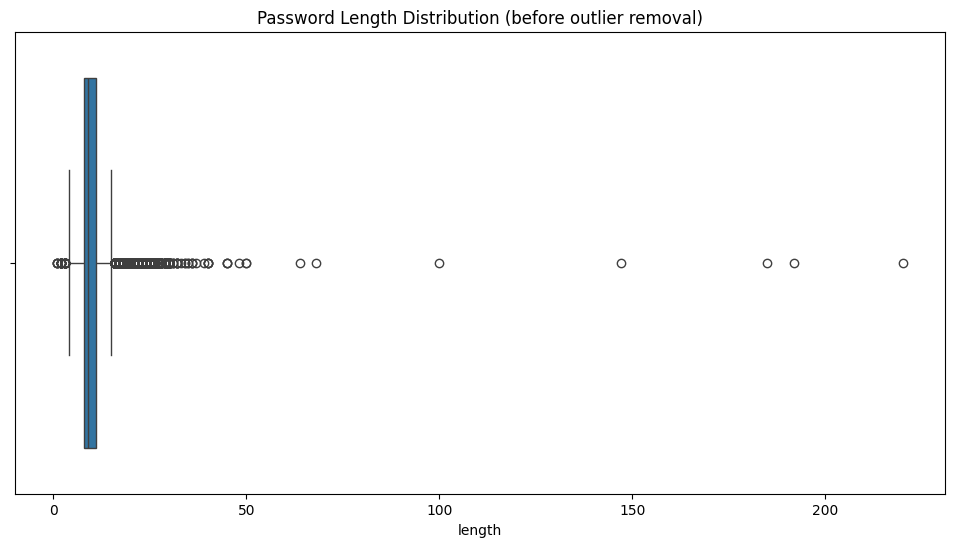

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(x=df["length"])
plt.title("Password Length Distribution (before outlier removal)")
plt.show()

- Boxplot menunjukkan distribusi panjang password dalam dataset sebelum penghilangan outlier. Sebagian besar password berada pada rentang 0–15 karakter dengan median sekitar nilai tengah rentang tersebut.
- Kotak Interquartil (IQR) merepresentasikan 50% data paling umum, sedangkan whisker menunjukkan sebaran data yang masih dianggap normal. Titik-titik di luar whisker merupakan outlier, yaitu password dengan panjang ekstrem hingga lebih dari 200 karakter.

Trimmed by length quantiles: 6.00 .. 17.00
Rows before: 669,639 | after: 664,369


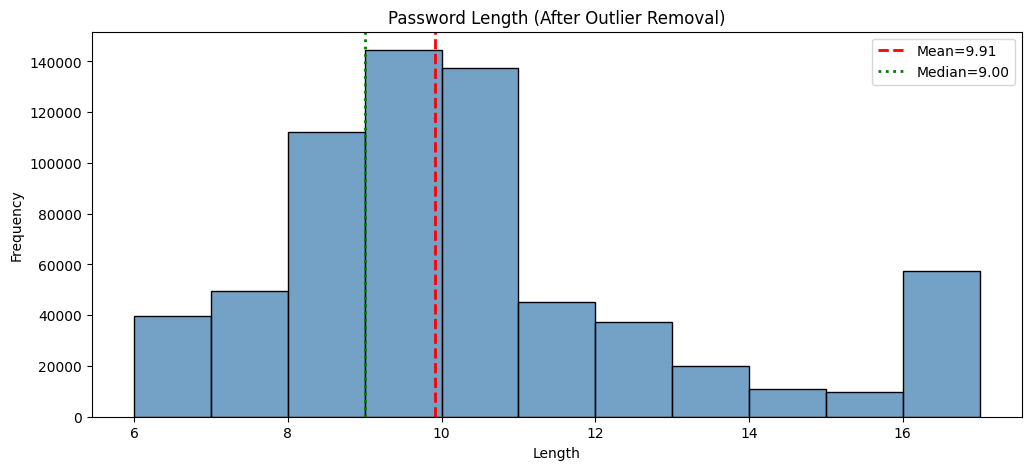

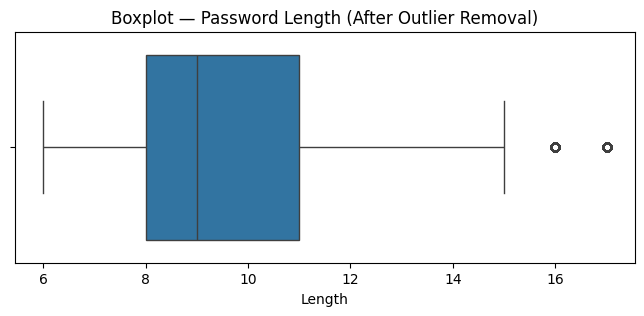

In [ ]:
# === Simple outlier removal (length 1%–99%) ===
low, high = df["length"].quantile([0.01, 0.99])
df_clean = df[df["length"].between(low, high)].reset_index(drop=True)

print(f"Trimmed by length quantiles: {low:.2f} .. {high:.2f}")
print(f"Rows before: {len(df):,} | after: {len(df_clean):,}")

# === Visualize AFTER removal only ===
plt.figure(figsize=(12,5))

# 🔹 FIXED histogram with integer-aligned bins (bars will touch)
bins = range(df_clean["length"].min(), df_clean["length"].max() + 1)
sns.histplot(df_clean["length"], bins=bins, color="steelblue", edgecolor="black")

plt.axvline(df_clean["length"].mean(), linestyle="--", linewidth=2, color="red", label=f"Mean={df_clean['length'].mean():.2f}")
plt.axvline(df_clean["length"].median(), linestyle=":", linewidth=2, color="green", label=f"Median={df_clean['length'].median():.2f}")
plt.title("Password Length (After Outlier Removal)")
plt.xlabel("Length"); plt.ylabel("Frequency"); plt.legend()
plt.show()

# === Boxplot (unchanged) ===
plt.figure(figsize=(8,3))
sns.boxplot(x=df_clean["length"])
plt.title("Boxplot — Password Length (After Outlier Removal)")
plt.xlabel("Length")
plt.show()


- Pembersihan outlier dengan metode kuantil 1%–99% dilakukan agar distribusi panjang password lebih representatif dan tidak dipengaruhi nilai ekstrem.
- Visualisasi histogram dan boxplot setelah pembersihan memperlihatkan kecenderungan panjang password yang lebih jelas dan akurat untuk analisis maupun pemodelan.

### **Strategi Penanganan Outlier**
Strategi penanganan untuk outlier yaitu melakukan identifikasi outlier dengan visualisasi (histogram/boxplot). Dari hasil visualisasi, terlihat ada password yang panjangnya ekstrem sehingga jauh dari pola umum. Password seperti ini merupakan “noise” atau “error” (data entry yang tidak wajar).
Jadi, data ekstrem dihapus/dibuang sehingga distribusi password length lebih representatif untuk populasi mayoritas.

# **3. Univariate Analysis**
- Distribusi variabel numerik (histogram, boxplot)
- Distribusi variabel kategorikal (frekuensi)
- Statistik ringkas per variabel


=== length Descriptive Stats ===
Count: 664,369
Mean: 9.91
Median: 9.00
Mode: 9
Min / Max: 6 / 17
Range: 11
Q1 / Q3: 8.00 / 11.00
IQR: 3.00
Std Dev: 2.62
Variance: 6.86
Skewness: 0.98
Kurtosis: 0.44

=== num_digits Descriptive Stats ===
Count: 664,369
Mean: 3.17
Median: 3.00
Mode: 2
Min / Max: 0 / 15
Range: 15
Q1 / Q3: 2.00 / 4.00
IQR: 2.00
Std Dev: 1.98
Variance: 3.93
Skewness: 1.30
Kurtosis: 1.68

=== num_symbols Descriptive Stats ===
Count: 664,369
Mean: 0.03
Median: 0.00
Mode: 0
Min / Max: 0 / 10
Range: 10
Q1 / Q3: 0.00 / 0.00
IQR: 0.00
Std Dev: 0.28
Variance: 0.08
Skewness: 12.10
Kurtosis: 200.80

=== num_upper Descriptive Stats ===
Count: 664,369
Mean: 0.78
Median: 0.00
Mode: 0
Min / Max: 0 / 15
Range: 15
Q1 / Q3: 0.00 / 0.00
IQR: 0.00
Std Dev: 2.27
Variance: 5.13
Skewness: 2.86
Kurtosis: 6.98

=== num_lower Descriptive Stats ===
Count: 664,369
Mean: 5.92
Median: 6.00
Mode: 6
Min / Max: 0 / 15
Range: 15
Q1 / Q3: 5.00 / 7.00
IQR: 2.00
Std Dev: 2.27
Variance: 5.17
Skewness: -0.24


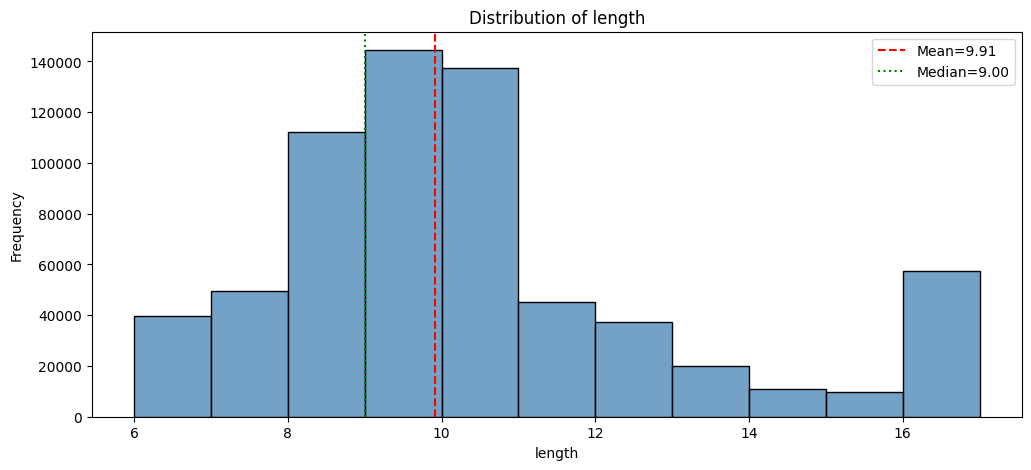

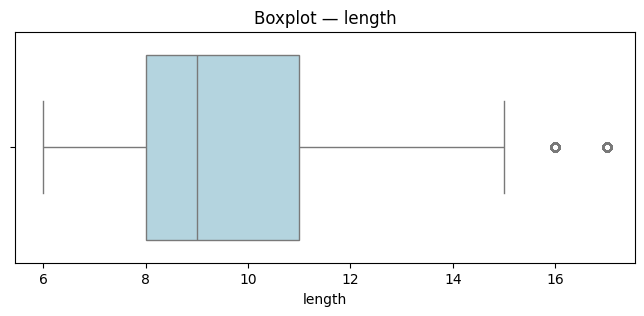

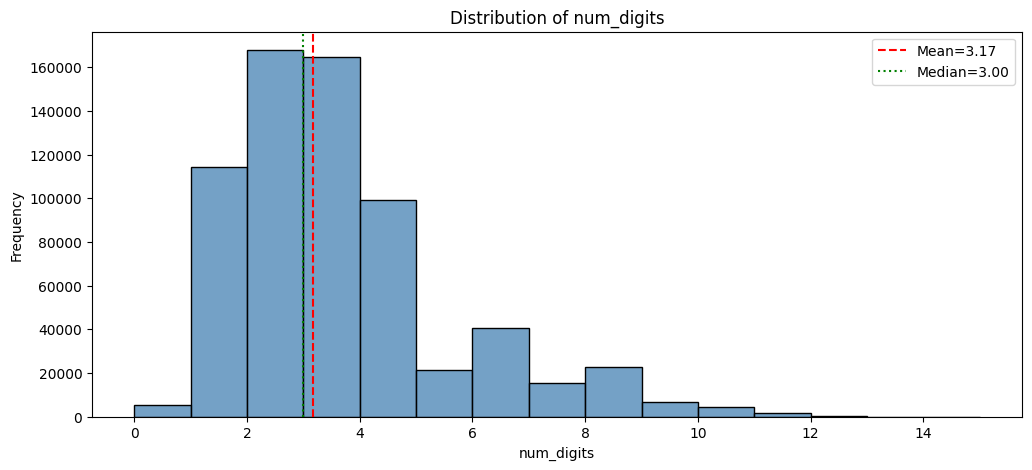

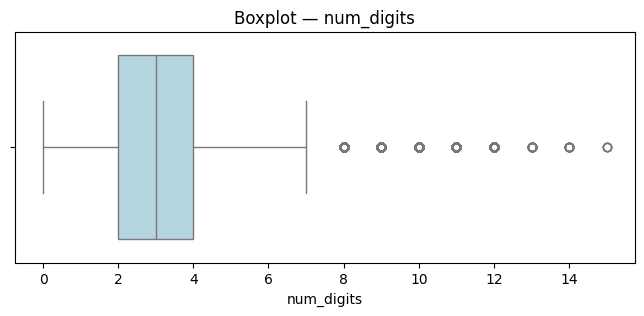

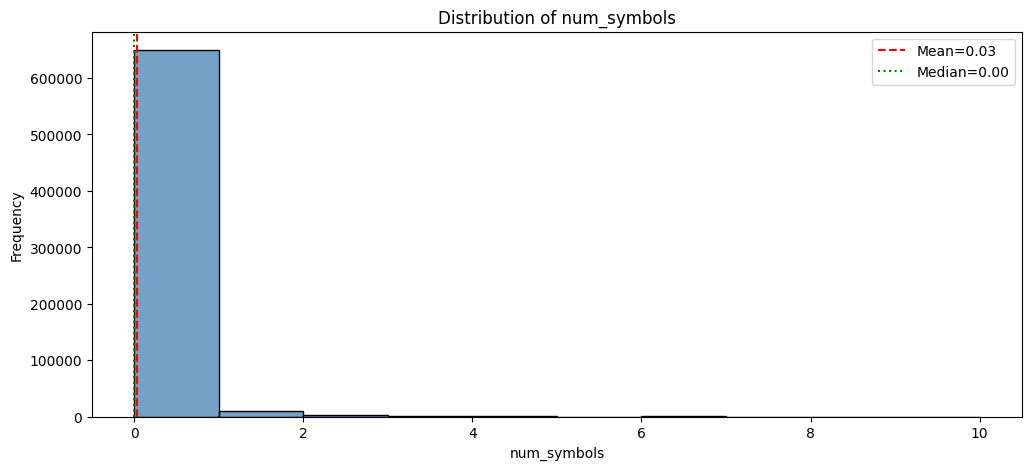

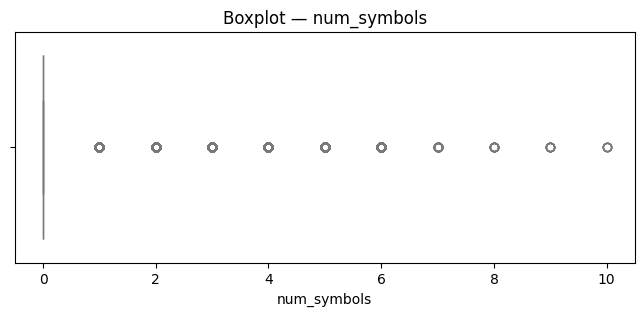

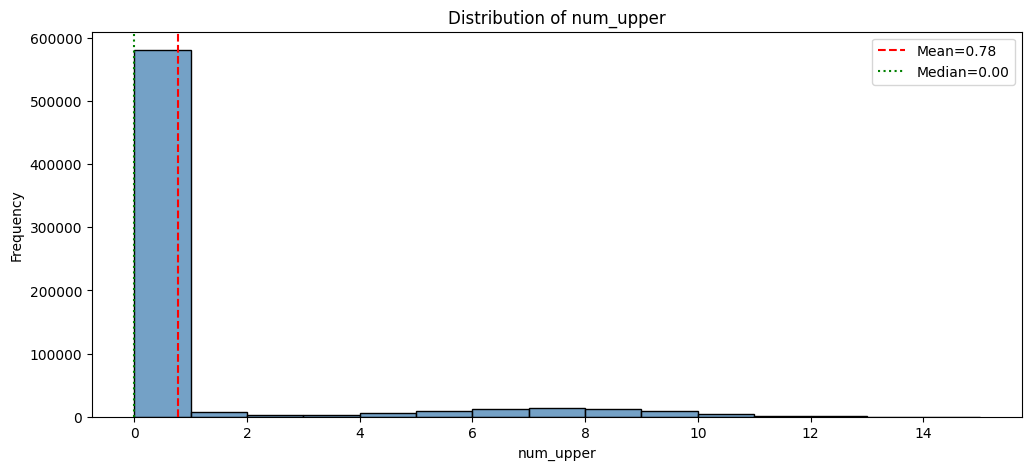

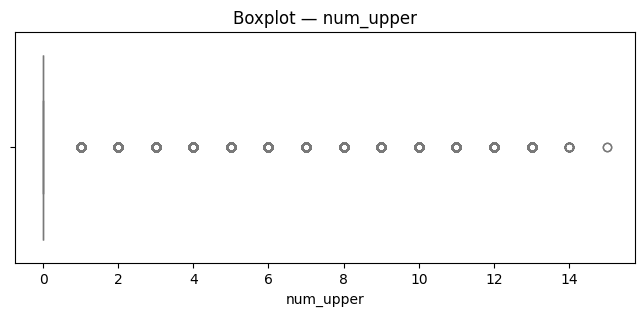

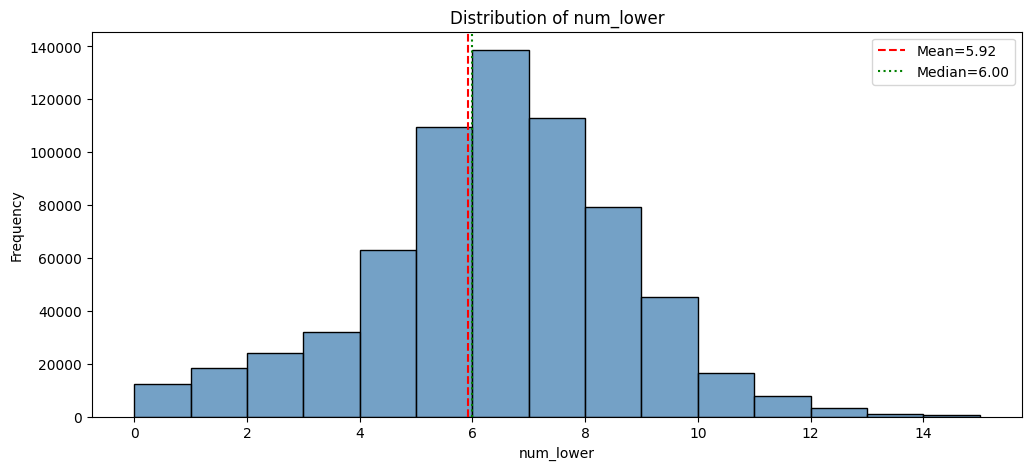

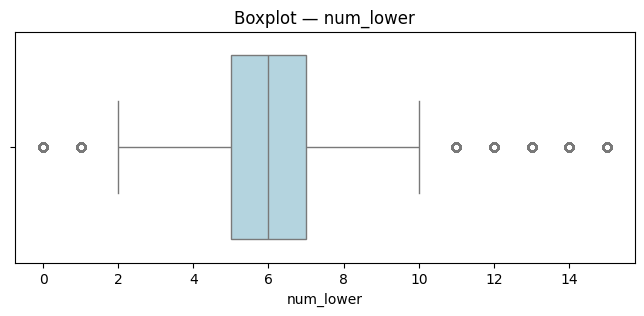

In [ ]:
# --- Features to analyze ---
features = ["length","num_digits","num_symbols","num_upper","num_lower"]

# --- 1. Descriptive stats function ---
def describe_series(s, name: str):
    q1, q3 = s.quantile([0.25, 0.75])
    mode_val = s.mode().iloc[0] if not s.mode().empty else np.nan
    print(f"\n=== {name} Descriptive Stats ===")
    print(f"Count: {len(s):,}")
    print(f"Mean: {s.mean():.2f}")
    print(f"Median: {s.median():.2f}")
    print(f"Mode: {mode_val}")
    print(f"Min / Max: {s.min()} / {s.max()}")
    print(f"Range: {s.max() - s.min()}")
    print(f"Q1 / Q3: {q1:.2f} / {q3:.2f}")
    print(f"IQR: {q3 - q1:.2f}")
    print(f"Std Dev: {s.std():.2f}")
    print(f"Variance: {s.var():.2f}")
    print(f"Skewness: {s.skew():.2f}")
    print(f"Kurtosis: {s.kurt():.2f}")

# --- 2. Print descriptive stats for all features ---
for feat in features:
    describe_series(df_clean[feat], feat)

# --- 3. Visualizations ---
for feat in features:
    # Histogram
    plt.figure(figsize=(12,5))
    bins = range(int(df_clean[feat].min()), int(df_clean[feat].max()) + 1)  # integer-aligned bins
    sns.histplot(df_clean[feat], bins=bins, color="steelblue", edgecolor="black")
    plt.axvline(df_clean[feat].mean(), color="red", linestyle="--", label=f"Mean={df_clean[feat].mean():.2f}")
    plt.axvline(df_clean[feat].median(), color="green", linestyle=":", label=f"Median={df_clean[feat].median():.2f}")
    plt.title(f"Distribution of {feat}")
    plt.xlabel(feat); plt.ylabel("Frequency")
    plt.legend()
    plt.show()

    # Boxplot
    plt.figure(figsize=(8,3))
    sns.boxplot(x=df_clean[feat], color="lightblue")
    plt.title(f"Boxplot — {feat}")
    plt.xlabel(feat)
    plt.show()





























- Length (Panjang Password)
  - Histogram menunjukkan nilai rata-rata panjang password sekitar 9-10 karakter di mana pengguna cenderung memilih password cukup panjang, namun masih ada variasi ke arah lebih panjang.
  - Pada boxplot, menunjukkan bahwa sebagian besar password cenderung berada di antara 6-15 karakter. Namun, terdapat beberapa outlier yang panjangnya melebihi 15 karakter.

- Num_digits (Jumlah Digit)
  - Histogram menunjukkan rata-rata jumlah digit dalam password 3.17 dengan median 3. Sebagian besar password memiliki 2-4 digit.
  - Boxplot memperlihatkan adanya banyak outlier pada password dengan jumlah digit melebihi 5. Sementara itu, mayoritas data dominan antara 0-5 digit.

- Num_symbols (Jumlah Simbol)
  - Histogram menunjukkan rata-rata password yang menggunakan simbol sangat rendah yaitu 0.03 dan median bernilai 0. Hampir semua password tidak mengandung simbol.
  - Boxplot memperlihatkan banyak outlier yaitu password yang mengandung hingga 10 simbol, di mana pengguna simbol masih jarang.

- Num_upper (Jumlah Huruf Kapital)
  - Histogram menunjukkan bahwa rata-rata huruf kapital 0.78 dan mediannya 0, menandakan sebagian besar password tidak mengandung huruf kapital sama sekali. Namun, ada beberapa kasus dengan jumlah huruf kapital tinggi.
  - Boxplot memperlihatkan bahwa banyak outlier pada nilai tinggi yang menunjukkan adanya password dengan dominansi huruf kapital.

- Num_lower (Jumlah Huruf Kecil)
  - Histogram memperlihatkan bahwa rata-rata huruf kecil dalam password adalah 5.92 dengan median 6. Sebagian besar password memiliki antara 4-8 huruf kecil.
  - Boxplot menunjukkan adanya outlier di kedua sisi. Password dengan huruf kecil yang sangat sedikit 0-2 maupun yang sangat banyak melebihi dari 10. Namun, distribusi data tetap dominan pada rentang 4-10 huruf kecil.

# **4. Multivariate Analysis**
- Heatmap korelasi
- PCA atau teknik dimensionality reduction (jika dataset besar)

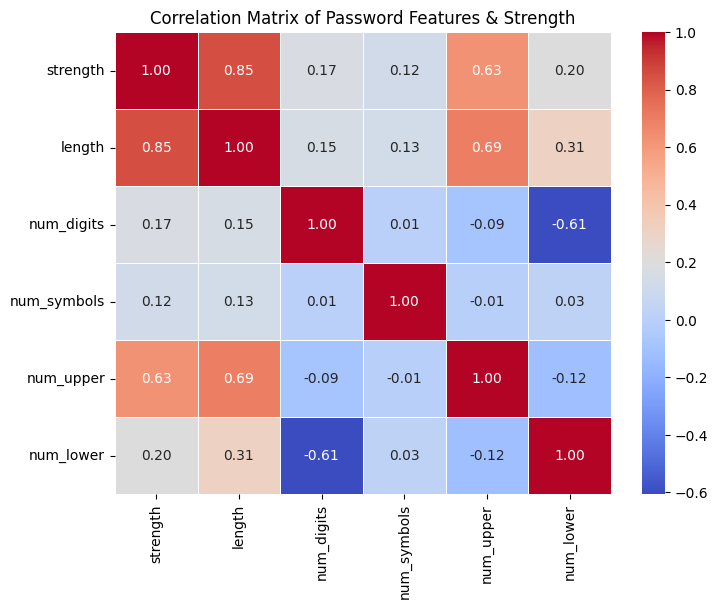

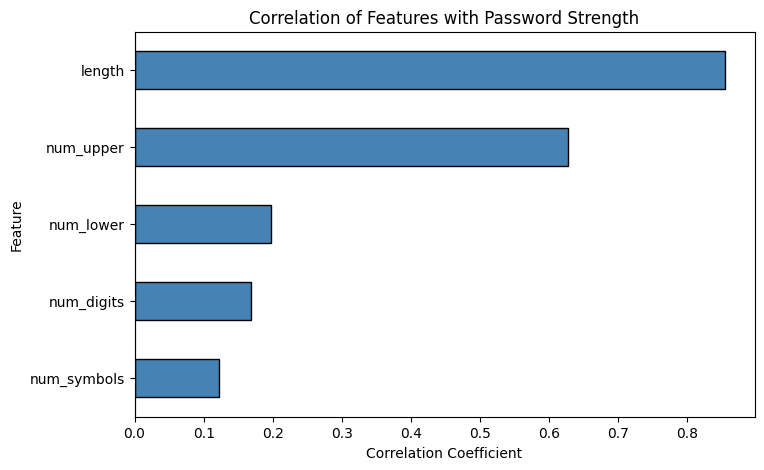

In [ ]:
# --- Select features + strength ---
corr_features = ["strength","length","num_digits","num_symbols","num_upper","num_lower"]

# --- Compute correlation matrix ---
corr = df_clean[corr_features].corr()

# --- 1. Heatmap (full correlation matrix) ---
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Password Features & Strength")
plt.show()

# --- 2. Bar chart (only feature vs strength) ---
corr_strength = corr["strength"].drop("strength")  # drop self-correlation

plt.figure(figsize=(8,5))
corr_strength.sort_values().plot(kind="barh", color="steelblue", edgecolor="black")
plt.axvline(0, color="black", linewidth=0.8)
plt.title("Correlation of Features with Password Strength")
plt.xlabel("Correlation Coefficient")
plt.ylabel("Feature")
plt.show()

### **Cara Membaca**
- Nilai korelasi berada di rentang -1 sampai +1:

  - +1 → hubungan linear positif sempurna.
  - -1 → hubungan linear negatif sempurna.
  - 0 → tidak ada hubungan linear.

- **Length (~0.85)**
Faktor paling berpengaruh terhadap kekuatan password. Artinya makin panjang password → makin besar kemungkinan masuk kategori "kuat".

- **Num_upper (~0.60)**
Penggunaan huruf kapital juga punya pengaruh kuat terhadap kekuatan password. Password dengan variasi huruf kecil + besar lebih sulit ditebak.

- **Num_lower (~0.20)**
Korelasi rendah, artinya jumlah huruf kecil tidak banyak membedakan antara lemah/sedang/kuat.

- **Num_digits (~0.18)**
Korelasi lemah → penggunaan angka sedikit membantu, tapi tidak signifikan.

- **Num_symbols (~0.12)**
Korelasi paling rendah, padahal simbol biasanya dianggap penting untuk keamanan. Terjadi karena distribusinya sangat jarang (hampir semua password tidak punya simbol).


























































### 📌 **Interpretasi Korelasi**
---

#### **Korelasi yang sangat kuat**

* **strength ↔ length (0.85)**
  Semakin panjang password, semakin kuat tingkat kekuatannya.
* **length ↔ num\_upper (0.69)** dan **strength ↔ num\_upper (0.63)**
  Password panjang cenderung punya huruf besar lebih banyak, dan huruf besar meningkatkan kekuatan password.

#### **Korelasi sedang**

* **length ↔ num\_lower (0.31)**
  Password panjang cenderung memiliki lebih banyak huruf kecil.
* **strength ↔ num\_lower (0.20)**
  Sedikit pengaruh positif huruf kecil terhadap kekuatan password.

#### **Korelasi lemah (mendekati 0)**

* **num\_digits ↔ strength (0.17)**
  Jumlah angka tidak terlalu berpengaruh pada kekuatan.
* **num\_symbols ↔ strength (0.12)**
  Jumlah simbol juga pengaruhnya kecil.
* **num\_digits ↔ num\_symbols (0.01)**
  Hampir tidak ada hubungan antara jumlah angka dan jumlah simbol.

#### **Korelasi negatif**

* **num\_digits ↔ num\_lower (-0.61)**
  Password yang banyak angkanya cenderung sedikit huruf kecilnya.
* **num\_upper ↔ num\_lower (-0.12)**
  Lebih banyak huruf besar biasanya berarti lebih sedikit huruf kecil.

---

### Ringkasan interpretasi

* **Panjang password** adalah faktor paling dominan untuk meningkatkan kekuatan.
* **Huruf besar** juga berkontribusi signifikan pada kekuatan.
* **Angka dan simbol** hanya punya efek kecil terhadap kekuatan, tetapi pola negatifnya menunjukkan trade-off: makin banyak angka, makin sedikit huruf kecil.
* **Variabel huruf kecil** punya pengaruh positif yang lemah terhadap kekuatan.

# 5. **Insight & Kesimpulan Awal**
* **Pola Menarik dari Data**

  * *Panjang password* (length) mempunyai korelasi yang sangat kuat dengan strength (0.85). Artinya makin panjang password, maka semakin kuat password tersebut.
  * *Jumlah huruf besar* (num_upper) juga berkorelasi cukup tinggi dengan strength (0.63) dan dengan panjang password (0.69). Jadi, password panjang cenderung mengandung lebih banyak huruf besar.
  * *Jumlah digit* dan *jumlah simbol* mempunyai korelasi positif yang sangat lemah dengan strength (0.17 dan 0.12), sehingga kontribusinya kecil terhadap kekuatan.
  * *Jumlah digit tinggi → jumlah huruf kecil rendah (-0.61)*. Ini menunjukkan komposisi karakter saling menggantikan.

* **Variabel Paling Berpengaruh**

  - *Length (panjang password)* → faktor paling dominan terhadap strength.
  - *Num_upper (huruf besar)* → variabel kedua yang paling berpengaruh terhadap strength.
  - Variabel lain seperti *num_digits* dan *num_symbols* berpengaruh lebih kecil.

* **Potensi Masalah**
  - Multicollinearity:
  Length dan num_upper mempunyai korelasi cukup tinggi (0.69); sehingga dapat memengaruhi performa model tertentu, misalnya regresi.
  - Strength dan length hampir “mirror” — bisa jadi panjang sudah menjelaskan hampir seluruh variasi strength.
  - Keseimbangan variabel : jika distribusi jumlah simbol atau huruf besar sangat jarang, model bisa tidak familiar pada variabel tersebut.
  - Keseimbangan antara digit dan huruf kecil bisa menimbulkan interaksi yang tidak linear.

* **Pertanyaan Lanjutan untuk Modeling**

  1. Apakah pengaruh panjang password terhadap strength tetap signifikan setelah mengontrol jumlah huruf besar, huruf kecil, digit, dan simbol?
  2. Perlukah membuat variabel gabungan (misalnya rasio huruf besar terhadap total karakter) untuk menangkap pola yang lebih detail?
  3. Bagaimana sebaran kategori kekuatan password (lemah, sedang, kuat)? Apakah seimbang atau banyak di satu kategori saja?
  4. Model apa yang paling sesuai dipakai, mengingat ada variabel-variabel yang saling mirip atau berkorelasi?
  5. Apakah ada batas panjang tertentu yang jelas membuat password jadi lebih kuat?

# 📝**Kesimpulan**
Kesimpulan menyeluruh dari analisis **Pola Kekuatan Password: Studi Karakteristik dan Distribusi Menggunakan Dataset Password Strength Classifier** adalah bahwa:
- Pola pembuatan password oleh pengguna cenderung cukup panjang tetapi kurang bervariasi. Mayoritas password yang dibuat memiliki panjang rata-rata sekitar 9–10 karakter, di mana hal tersebut memenuhi standar minimal keamanan.
- Analisis deskriptif menunjukkan bahwa password masih sangat didominasi oleh huruf kecil, hanya sedikit menggunakan angka, dan sangat jarang menyertakan huruf kapital maupun simbol.
- Faktor paling berpengaruh terhadap kekuatan password adalah *panjang password* dan *jumlah huruf kapital*, dibandingkan dengan angka, huruf kecil, dan simbol.
- Hal ini menunjukkan bahwa banyak pengguna hanya mengandalkan panjang password tanpa menambahkan variasi karakter yang memadai, sehingga meskipun relatif panjang, password tetap rentan terhadap serangan brute force atau dictionary attack.

Dengan demikian, dapat disimpulkan bahwa menganalisis password yang benar-benar kuat, pengguna perlu mengombinasikan *panjang yang mencukupi (≥12 karakter)* dengan *keragaman karakter* (huruf kecil, huruf besar, angka, dan simbol), bukan hanya mengandalkan satu kategori saja. Analisis ini memberikan kesimpulan bahwa edukasi keamanan sebaiknya menekankan pentingnya keseimbangan antara panjang dan karakter yang variatif dalam pembuatan password.